In [1]:
#pip install nltk

In [2]:
import nltk
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import os
nltk.download('stopwords')
stopword_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Chinyemba/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Preperation

In [3]:
hs1 = pd.read_csv('HSE_2.csv')
hs2 = pd.read_csv('HSE_3.csv')
hs3 = pd.read_csv('HSE_4.csv')
hs4 = pd.read_csv('HSE_5.csv')
hs5 = pd.read_csv('HSE_6.csv')

In [4]:
hseframes = [hs1, hs2, hs3, hs4, hs5]
hsedata = pd.concat(hseframes)

In [5]:
hsedata.head()

,id,Action Source,Source Ref No.,Action or Task No.,Target Date,Description,Action,Responsible Person_Department,BP Responsible Person,Date Closed,How was this action closed,Status,Unnamed: 11
0,175,Heli Ops Review,NaN,1,NaN,Piece of rusty wire found caught in perimeter ...,Inspect and remove any item of FOD (Foreign Ob...,Captain,PSVM Rig HSSE Advisor,14/05/2011,Part of HLO’s Duties. Closed May14th,Closed,NaN
1,293,Marine Audit,Ballast System 11-08-11,1,31/12/2011,Perform annual Marine Audit (Reported separate...,The second of this years Emergency Ballast Dri...,Captian,PSVM Rig HSSE Advisor,21/08/2011,The documented responses are to be provided in...,Closed,NaN
2,297,Internal ISO14001 Audit,1B-Waster Management,1,31/08/2011,Biohazard bags were found in the Hazardous Was...,Communicate in the weekly safety meeting that ...,TOI RSTC & TOI OIM,BP HSEA,28/08/2011,The weekly safety meetings and daily planning ...,Closed,NaN
3,176,Heli Ops Review,NaN,2,NaN,Perimeter net securing wire is broken and atta...,Inspect and secure perimeter net with correct ...,Captain,PSVM Rig HSSE Advisor,16/05/2011,Ti- wraps have been replaced with correct mate...,Closed,NaN
4,294,Marine Audit,Ballast System 11-08-12,2,31/12/2011,Perform annual Marine Audit (Reported separate...,There are seven tank sounding transponders fau...,Captain and Maintenacnec Supr.,PSVM Rig HSSE Advisor,21/08/2011,The documented responses are to be provided in...,Closed,NaN


In [6]:
print(hsedata.columns)

Index(['id', 'Action Source ', 'Source Ref No.', 'Action or Task No. ',
       'Target Date', 'Description', 'Action ',
       'Responsible Person_Department', 'BP Responsible Person ',
       'Date Closed', 'How was this action closed', 'Status', 'Unnamed: 11'],
      dtype='object')


In [7]:
hsedata = hsedata.drop(['id','Source Ref No.', 'Action or Task No. ', 
              'Responsible Person_Department', 'BP Responsible Person ', 'Date Closed', 
              'How was this action closed', 'Status', 'Unnamed: 11'], axis = 1)

In [8]:
hsedata.head()

,Action Source,Target Date,Description,Action
0,Heli Ops Review,NaN,Piece of rusty wire found caught in perimeter ...,Inspect and remove any item of FOD (Foreign Ob...
1,Marine Audit,31/12/2011,Perform annual Marine Audit (Reported separate...,The second of this years Emergency Ballast Dri...
2,Internal ISO14001 Audit,31/08/2011,Biohazard bags were found in the Hazardous Was...,Communicate in the weekly safety meeting that ...
3,Heli Ops Review,NaN,Perimeter net securing wire is broken and atta...,Inspect and secure perimeter net with correct ...
4,Marine Audit,31/12/2011,Perform annual Marine Audit (Reported separate...,There are seven tank sounding transponders fau...


In [9]:
#fill date nan with mode

for column in ['Target Date']:
    hsedata[column].fillna(hsedata[column].mode()[0], inplace=True)

In [10]:
#hsedata = hsedata.replace(np.nan, '', regex=True)

In [11]:
hsedata.isnull().sum(axis = 0)

Action Source     346
Target Date         0
Description       345
Action            357
dtype: int64

In [12]:
hsedata = hsedata.dropna()

In [13]:
hsedata.isnull().sum(axis = 0)

Action Source     0
Target Date       0
Description       0
Action            0
dtype: int64

In [14]:
hsedata.tail()

,Action Source,Target Date,Description,Action
1841,IR,4/1/2012,Employee strained back,Instigate / reinforce procedure on board such ...
1842,IR,5/1/2012,Employee strained back,reinforce that all tasks involving individual ...
1843,IR,4/17/2012,The diverter vale opened,Update procedure for pulling riser to include ...
1844,IR,4/17/2012,The diverter vale opened,Update the RSN procedure for working with Hydr...
1845,IR,4/17/2012,The diverter vale opened,Update procedure to include that when the dive...


In [15]:
hsedata.shape

(3173, 4)

In [16]:
hsedata['Description'] = hsedata['Description'].astype(str)

In [17]:
#remove punctuation/lower casing
import re

In [18]:
hsedata['hse_processed_txt'] = hsedata['Description'].map(lambda x: re.sub('[,\.!?]', '', x))

In [19]:
hsedata.head()

,Action Source,Target Date,Description,Action,hse_processed_txt
0,Heli Ops Review,31/12/2010,Piece of rusty wire found caught in perimeter ...,Inspect and remove any item of FOD (Foreign Ob...,Piece of rusty wire found caught in perimeter ...
1,Marine Audit,31/12/2011,Perform annual Marine Audit (Reported separate...,The second of this years Emergency Ballast Dri...,Perform annual Marine Audit (Reported separate...
2,Internal ISO14001 Audit,31/08/2011,Biohazard bags were found in the Hazardous Was...,Communicate in the weekly safety meeting that ...,Biohazard bags were found in the Hazardous Was...
3,Heli Ops Review,31/12/2010,Perimeter net securing wire is broken and atta...,Inspect and secure perimeter net with correct ...,Perimeter net securing wire is broken and atta...
4,Marine Audit,31/12/2011,Perform annual Marine Audit (Reported separate...,There are seven tank sounding transponders fau...,Perform annual Marine Audit (Reported separate...


In [20]:
#convert titles to lowercase

In [21]:
hsedata['hse_processed_txt'] = hsedata['hse_processed_txt'].map(lambda x: x.lower())

In [22]:
#convert out of first rows of papers
hsedata['hse_processed_txt'].head()

0    piece of rusty wire found caught in perimeter ...
1    perform annual marine audit (reported separate...
2    biohazard bags were found in the hazardous was...
3    perimeter net securing wire is broken and atta...
4    perform annual marine audit (reported separate...
Name: hse_processed_txt, dtype: object

## Data Exploration

In [23]:
#pip install wordcloud

In [24]:
#import wordcloud library
from wordcloud import WordCloud

In [25]:
longString = ''.join([i for i in hsedata['hse_processed_txt'] if not i.isdigit()])
longString = ','.join(list(hsedata['hse_processed_txt'].values))
print(longString)

piece of rusty wire found caught in perimeter safety net @ 4:00 o’clock location (when viewed forward),perform annual marine audit (reported separately in imca m149 standard cmid format as dsl
cmid aug 2011 final revision)
review procedures and preparedness for risk of ballast failure/collision through
see the audit document (dsl 110811) to further clarify the basis for the actions
,biohazard bags were found in the hazardous waste skips only the medic should have access to biohazard bags and these should only be used for medical waste this is because it is important to accurately communicate the hazards associated with waste hazardous waste is charged at $900 per tonne by aes but medical waste is charged at $2500 per tonne hence the cost of disposing hazardous skips with biohazard bags would be much greater than necessary,perimeter net securing wire is broken and attached by plastic ti-wrap @ 4:30 location (when viewed forward) photo 1  plastic ti-wraps used to secure net at 11:30 o’cl

In [26]:
#create word cloud object
wordcloud = WordCloud(background_color = 'white', 
                      max_words = 5000, contour_width = 3,
                      contour_color = 'steelblue')

In [27]:
#Generate a word cloud
wordcloud.generate(longString)


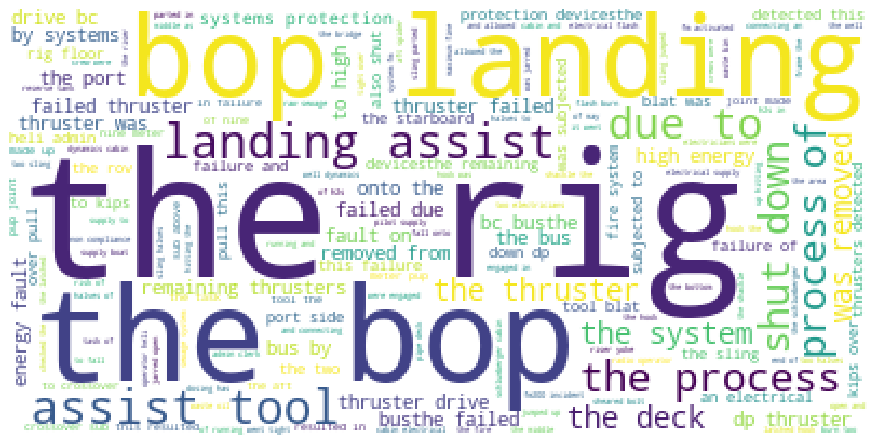

In [28]:
plt.figure(figsize = (12,6))
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)   
plt.show() 
#wordcloud.to_image #to visualise it

## Prep for LDA Model

In [29]:
#Load library with countVector method

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [31]:
#helper function
def plot10CommonWords(count_data, count_vectorizer):
        words = count_vectorizer.get_feature_names()
        total_counts = np.zeros(len(words))
        for t in count_data:
            total_counts += t.toarray()[0]
            
            count_dict = (zip(words, total_counts))
            count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
            words = [w[0] for w in count_dict]
            counts = [w[1] for w in count_dict]
            x_pos = np.arange(len(words))
            
        plt.figure(figsize = (12,6))
        plt.subplot(title = '10 Most Common Words')
        sns.set_context('notebook', font_scale = 1.25, rc = {'lines.linewidth':2.5})
        sns.barplot(x_pos, counts, palette = 'tab10')
        plt.xticks(x_pos, words, rotation = 45)
        plt.xlabel('words')
        plt.ylabel('counts')
        plt.show()

In [32]:
#initiate count vectorizer with English stop words

count_vectorizer = CountVectorizer(stop_words = 'english')

In [33]:
#fit and transform the processed titles

count_data = count_vectorizer.fit_transform(hsedata['hse_processed_txt'])

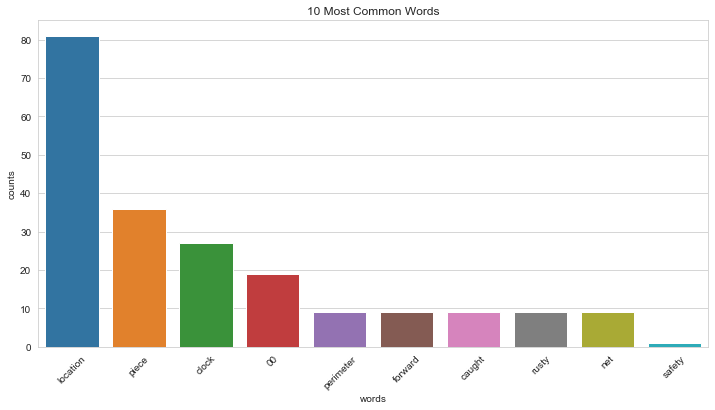

In [34]:
#visualise most 20 common words

plot10CommonWords(count_data, count_vectorizer)


## LDA Model + Visualisations

In [35]:
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

In [36]:
# Load the LDA model
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [37]:
#function to print topics
def PrintTopics(model, count_vectorizer, num_top_words):
        words = count_vectorizer.get_feature_names()
        for topic_indx, topic in enumerate(model.components_):
            print('\nTopic #%d:' % topic_indx)
            print (' '.join([words[i]
                            for i in topic.argsort()[:-num_top_words - 1:-1]]))



In [50]:
#parameters
num_topics = 20
num_words = 15 #number of words in the topic

#LDA Model and Fitting
lda = LDA(n_components = num_topics, n_jobs = -1)
lda.fit(count_data)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=20, n_jobs=-1,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [51]:
#print topics found by LDA model
print('Topics Found via the LDA:')
PrintTopics(lda, count_vectorizer, num_words)

Topics Found via the LDA:

Topic #0:
riser crane joints yoke deck assembly rig moving crew starboard port boat bay process previous

Topic #1:
electrical supply cabin port task running pilot schlumberger connecting burn engaged dynamics electricians flash pressure

Topic #2:
tank mud port noticed bolt sheared h2s inches eggs faint rotten desilter old rig washer

Topic #3:
tool bop landing assist failure joint blat pull kips sub subjected 1513 resulted pup crossover

Topic #4:
spill connection head lbs drilling luanda surface gas discoverer hazop fluid systems waste make turning

Topic #5:
ems rig risk port portuguese need containers aes holes versions aspects environmental msds board frangible

Topic #6:
waste bags equipment hazardous biohazard boat supply medical skips tonne charged used cap approximately piece

Topic #7:
chlorine sewage dosing 12 05 decree compliance end non toi raw requires parts welder wsl

Topic #8:
assembly filler plug hose free came forward weight bridge finger 

In [52]:
#pip install pyLDAvis

In [53]:
%%time
from pyLDAvis import sklearn as sklearn_lda
import pickle
import pyLDAvis

CPU times: user 101 µs, sys: 1.97 ms, total: 2.07 ms
Wall time: 9.64 ms


In [54]:
LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(num_topics))
if 1 ==1:
    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
    
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

#load pre-prepared pyLDAvis data from disk

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
    

In [55]:
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+str(num_topics) + '.html')